In [1]:
'''
集成算法：它是通过在数据上构建多个模型，集成所有模型的建模结果，
随机森林的基评估器(模型)是决策树，集成算法有三种：bagging(装袋法),Boosting(提升法)
和stacking
bagging:构建多个相互独立的评估器（模型），然后进行预测进行平均或者多数表决原则来决定结果
boosting:基评估器是相关的，按顺序一一构建，结合弱评估器的力量一次次的对难以评估的样本进行预测
'''

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine=load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
#构建模型
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(wine.data,wine.target,
                                               test_size=0.3)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(124, 13)
(124,)
(54, 13)
(54,)


In [6]:
clf=DecisionTreeClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)

clf=clf.fit(train_x,train_y)
rfc=rfc.fit(train_x,train_y)

score_c=clf.score(test_x,test_y)
score_r=rfc.score(test_x,test_y)

print("TreeClassifier:{}".format(score_c),
      "RandomClassifier:{}".format(score_r))

TreeClassifier:0.9074074074074074 RandomClassifier:0.9814814814814815


In [7]:
#重要接口的使用
rfc.feature_importances_

array([0.09835134, 0.04191654, 0.01728234, 0.03109314, 0.03303269,
       0.05949329, 0.14618132, 0.01111577, 0.03059697, 0.16909598,
       0.08890396, 0.10007058, 0.17286606])

In [8]:
#apply：返回每个测试样本所在的叶子节点的索引
rfc.apply(test_x)

array([[ 4,  4,  5, ...,  2,  4, 11],
       [ 1,  5, 10, ...,  7,  1,  3],
       [ 1,  5, 10, ...,  7,  1,  3],
       ...,
       [16, 12, 23, ..., 14, 10, 16],
       [ 1, 12, 19, ...,  9,  1,  3],
       [ 4,  4,  5, ...,  2,  4, 11]], dtype=int64)

In [9]:
#返回每个测试样本的分类/回归结果
rfc.predict(test_x)

array([2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 1, 2, 0, 1, 2])

In [10]:
#返回每个测试样本分类的概率值
rfc.predict_proba(test_x)

array([[0.  , 0.  , 1.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.02, 0.98, 0.  ],
       [0.01, 0.96, 0.03],
       [0.98, 0.01, 0.01],
       [0.04, 0.43, 0.53],
       [0.  , 0.29, 0.71],
       [0.01, 0.99, 0.  ],
       [0.07, 0.93, 0.  ],
       [0.1 , 0.81, 0.09],
       [0.01, 0.99, 0.  ],
       [0.75, 0.18, 0.07],
       [0.05, 0.85, 0.1 ],
       [0.02, 0.04, 0.94],
       [0.97, 0.03, 0.  ],
       [0.  , 0.16, 0.84],
       [0.11, 0.88, 0.01],
       [0.02, 0.2 , 0.78],
       [0.89, 0.03, 0.08],
       [0.95, 0.02, 0.03],
       [0.  , 0.98, 0.02],
       [0.92, 0.07, 0.01],
       [1.  , 0.  , 0.  ],
       [0.77, 0.2 , 0.03],
       [0.88, 0.11, 0.01],
       [0.01, 0.97, 0.02],
       [0.96, 0.04, 0.  ],
       [0.89, 0.11, 0.  ],
       [0.59, 0.4 , 0.01],
       [0.  , 0.  , 1.  ],
       [0.3 , 0.7 , 0.  ],
       [0.01, 0.89, 0.1 ],
       [0.01, 0.09, 0.9 ],
       [0.03, 0.  , 0.97],
       [0.26, 0.59, 0.15],
       [0.95, 0.03, 0.02],
 

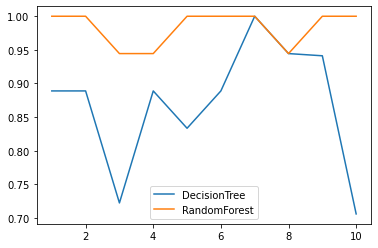

In [11]:
#测试在一组交叉验证的情况下的效果对比
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
clf=DecisionTreeClassifier()
clf_s=cross_val_score(clf,wine.data,wine.target,cv=10)
rfc=RandomForestClassifier(n_estimators=25)
rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10)
plt.plot(range(1,11),clf_s,label="DecisionTree")
plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.legend()
plt.show()

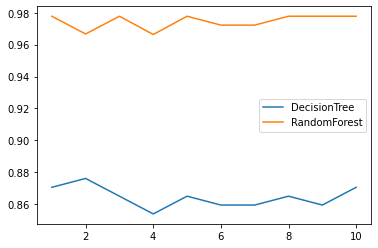

In [12]:
clf_1=[]
rfc_1=[]
for i in range(1,11):
    clf=DecisionTreeClassifier()
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_1.append(clf_s)
    rfc=RandomForestClassifier(n_estimators=25)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_1.append(rfc_s)
plt.plot(range(1,11),clf_1,label="DecisionTree")
plt.plot(range(1,11),rfc_1,label="RandomForest")
plt.legend()
plt.show()

In [23]:
rfc=RandomForestClassifier(n_estimators=25,random_state=10)
rfc=rfc.fit(train_x,train_y)
rfc.score(test_x,test_y)

0.9814814814814815

In [19]:
#获取每棵随机树里的信息
len(rfc.estimators_)
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1165313289
1283169405
89128932
2124247567
574014784
1902734705
1068604539
1425548444
2141071321
357864157
965494256
108111773
850673521
898541562
1118970888
1140597833
726325504
1132165610
379416616
645868022
796114340
789494131
1947309584
1359794532
16957679


In [25]:
'''
为了让每一个基分类器都不一样，保证随机性越大，袋装法的效果会越来越好，
来确保随机深林比单个分类器好
可以使用random_state(随机抽取里面的特征)，比较简单的
可以采用有放回的随机抽样，bootsrap为True时表示开启了又放回的随机抽样
,oob_score表示用落在袋外的数据进行测试，袋里的数据用来测试，
所以在随机深森林中可以不用划分测试集和训练集

'''
rfc=RandomForestClassifier(n_estimators=25,oob_score=True,bootstrap=True)
rfc=rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9719101123595506

In [26]:
rfc.feature_importances_

array([0.13607265, 0.04467601, 0.01408032, 0.02816508, 0.02552468,
       0.03001446, 0.15561281, 0.01870778, 0.02810205, 0.13214765,
       0.08078315, 0.10589593, 0.20021743])

In [28]:
rfc.score(test_x,test_y)

1.0